In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
import random
import datetime as dt
import os
%pylab inline
import urllib
import urllib.request


Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
os.chdir(os.getenv("PUIDATA"))
urllib.request.urlretrieve("https://data.cityofnewyork.us/api/views/xywu-7bv9/rows.csv?accessType=DOWNLOAD", "file.csv")

#New York City Population by Borough, 1950 - 2040

('file.csv', <http.client.HTTPMessage at 0x7fda89838898>)

In [23]:
data = pd.read_csv('file.csv',usecols=[1,8,10,12,14,16,18,20])
data.drop([0,5],inplace=True)
data1 = data.T
data1.rename(columns={1:'Bronx',2: 'Brooklyn',3:'Manhattan',4:'Queens',},inplace=True)
data1.drop(['Borough'],inplace=True)
data1['Brooklyn'] = data1['Brooklyn'].astype(np.int64)
data1['Queens'] = data1['Queens'].astype(np.int64)
data1['Manhattan'] = data1['Manhattan'].astype(np.int64)
data1['Bronx'] = data1['Bronx'].astype(np.int64)

#data1['Growth_rate_Brooklyn']=data1['Brooklyn'].pct_change
Growth_rate_Brooklyn = data1['Brooklyn'].pct_change(periods=1)
Growth_rate_Manhattan = data1['Manhattan'].pct_change(periods=1)
Growth_rate_Queens = data1['Queens'].pct_change(periods=1)


In [6]:
Growth_rate_Brooklyn2 = Growth_rate_Brooklyn.iloc[:4]
Growth_rate_Manhattan2 = Growth_rate_Manhattan.iloc[:4]


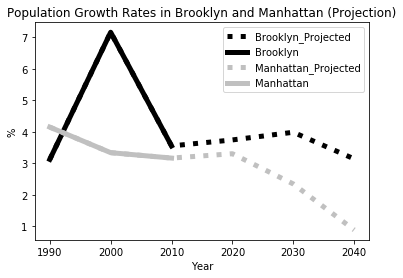

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(Growth_rate_Brooklyn*100,color='k', label='Brooklyn_Projected', ls=':', lw=5)
ax.plot(Growth_rate_Brooklyn2*100,color='k', label='Brooklyn', ls='-', lw=5)

ax.plot(Growth_rate_Manhattan*100 ,color='silver' , label='Manhattan_Projected', ls=':', lw=5)
ax.plot(Growth_rate_Manhattan2*100,color='silver', label='Manhattan', ls='-', lw=5)
pl.xlabel("Year")
pl.ylabel("%")
plt.title("Population Growth Rates in Brooklyn and Manhattan (Projection)")
plt.legend()

In [24]:
Brooklyn2 = data1['Brooklyn'].iloc[:4]
Manhattan2 = data1['Manhattan'].iloc[:4]
Queens2 = data1['Queens'].iloc[:4]
Bronx2 = data1['Bronx'].iloc[:4]

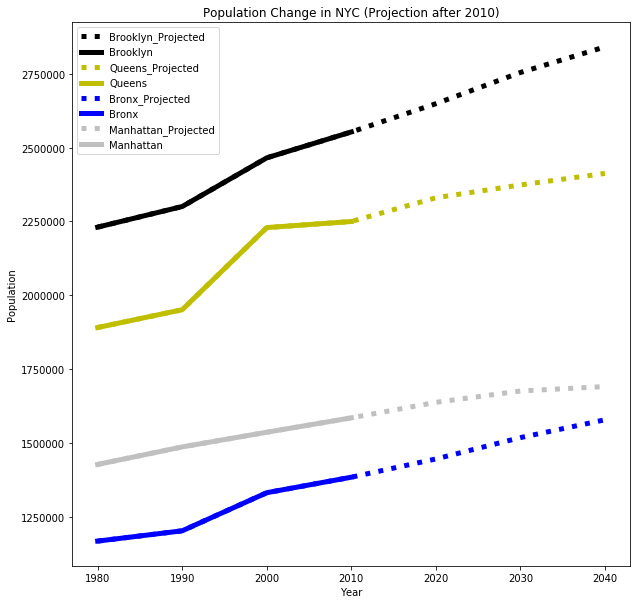

In [32]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)

ax.plot(data1['Brooklyn'],color='k', label='Brooklyn_Projected', ls=':', lw=5)
ax.plot(Brooklyn2,color='k', label='Brooklyn', ls='-', lw=5)

ax.plot(data1['Queens'],color='y', label='Queens_Projected', ls=':', lw=5)
ax.plot(Queens2,color='y', label='Queens', ls='-', lw=5)

ax.plot(data1['Bronx'],color='b', label='Bronx_Projected', ls=':', lw=5)
ax.plot(Bronx2,color='b', label='Bronx', ls='-', lw=5)

ax.plot(data1['Manhattan'] ,color='silver' , label='Manhattan_Projected', ls=':', lw=5)
ax.plot(Manhattan2,color='silver', label='Manhattan', ls='-', lw=5)
pl.xlabel("Year")
pl.ylabel("Population")
plt.title("Population Change in NYC (Projection after 2010)")
plt.legend()